In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import zipfile
import torch.optim as optim
from c2net.context import prepare
from c2net.context import upload_output
import random
import os



In [2]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/d4/55/90db48d85f7689ec6f81c0db0622d704306c5284850383c090e6c7195a5c/pip-24.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.8 kB/s eta 0:00:0000:0100:03m
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 391.8 kB/s eta 0:00:0000:0100:03
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.5 kB/s eta 0:00:0000:0300:13
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 29.7 kB/s eta 0:00:0000:0700:15
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.4 kB/s eta 0:00:00a 0:00:04
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 初始化上下文

c2net_context = prepare()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



       ___                _            _            _          
      |__ \              | |          | |          | |         
  ___    ) | _ __    ___ | |_  ______ | |__    ___ | |_   __ _ 
 / __|  / / | '_ \  / _ \| __||______|| '_ \  / _ \| __| / _` |
| (__  / /_ | | | ||  __/| |_         | |_) ||  __/| |_ | (_| |
 \___||____||_| |_| \___| \__|        |_.__/  \___| \__| \__,_|
                                                               
         

If you have any problems while preparing the data, you can submit an issue in this repository: https://openi.pcl.ac.cn/OpenIOSSG/c2net-pypi
        
Detected .code_cache_file already exists, code has been prepared!
Detected .dataset_cache_file already exists, dataset has been prepared!
please set c2net_context.output_path as the output location


In [9]:
swh_dataset_path = c2net_context.dataset_path + "/" + "processed_data_latlontime.zip" 
npz_file_name = 'processed_data_latlontime.npz'
with zipfile.ZipFile(swh_dataset_path, 'r') as zip_ref:
    with zip_ref.open(npz_file_name) as npz_file:
        data = np.load(npz_file)
        scaled_data1 = data["scaled_data1"]
        scaled_data2 = data["scaled_data2"]
        swh = data["swh"]
        lon = data['lon']
        lat = data['lat']
        time = data['time']

In [ ]:
result_dataset_path = c2net_context.dataset_path + "/" + "timeresults.zip" 
vit_results_name = 'vit_results.npz'
ann_results_name='ann_results_swh.npz'
cnn_results_name='cnn_results.npz'
hybrid_results_name='hybrid_results.npz'
trans_results_name='trans_results.npz'
with zipfile.ZipFile(result_dataset_path, 'r') as zip_ref:
    with zip_ref.open(vit_results_name) as npz_file:
        vit_data = np.load(npz_file)
        # 获取并打印所有key名称
        keys = vit_data.keys()
        print("Keys in the npz file:", list(keys))
        era5_swh = vit_data["test_swh"]
        lon = vit_data['lon']*0.25
        lat = vit_data['lat']*0.25
        vit_swh = vit_data['test_predictions']
    with zip_ref.open(ann_results_name) as npz_file:
        ann_data = np.load(npz_file)
        ann_swh = ann_data['test_predictions']
    with zip_ref.open(cnn_results_name) as npz_file:
        cnn_data = np.load(npz_file)
        cnn_swh = cnn_data['test_predictions']
    with zip_ref.open(hybrid_results_name) as npz_file:
        hybrid_data = np.load(npz_file)
        hybrid_swh = hybrid_data['test_predictions']
    with zip_ref.open(trans_results_name) as npz_file:
        trans_data = np.load(npz_file)
        trans_swh = trans_data['test_predictions']
len(lon)

Keys in the npz file: ['train_losses', 'valid_losses', 'test_losses', 'test_predictions', 'test_swh', 'test_data1', 'test_data2', 'lon', 'lat', 'time']


32497

In [12]:
len(era5_swh)

32497

In [11]:
era5_swh

array([2.0233614, 1.8422375, 0.5466394, ..., 2.4506004, 3.9887958,
       1.4634358], dtype=float32)

In [14]:

x = era5_swh
y = trans_swh


In [41]:
x=swh2

y=swh1


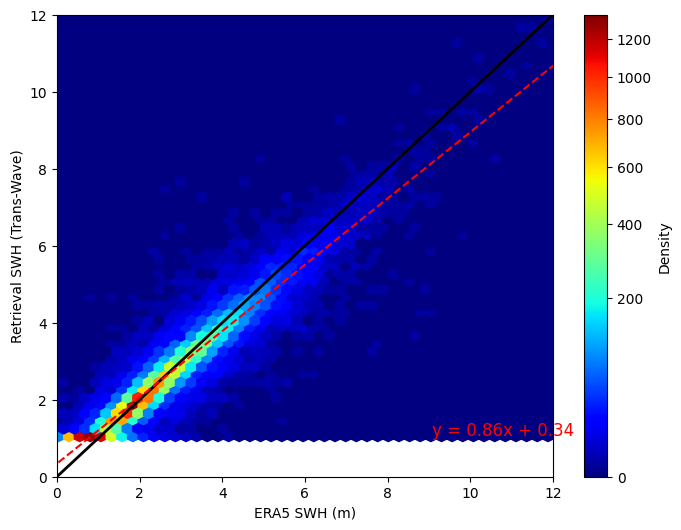

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
from matplotlib import cm




# Create the density scatter plot
plt.figure(figsize=(8, 6))
hb = plt.hexbin(x, y, gridsize=50, cmap='jet', norm=PowerNorm(0.5))

# Plot y = x line
plt.plot([0, 12], [0, 12], color='black', linestyle='-', linewidth=2, label='y = x')

# Perform a linear fit
coefficients = np.polyfit(x, y, 1)
fit_line = np.poly1d(coefficients)
plt.plot(np.sort(x), fit_line(np.sort(x)), 'r--', label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

# Add fit equation text on the bottom right corner
plt.text(0.9, 0.1, f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}', fontsize=12, color='red', 
         ha='center', va='center', transform=plt.gca().transAxes)

# Add color bar for density
cb = plt.colorbar(hb, label='Density')

# Set axis limits and labels
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.xlabel('ERA5 SWH (m)')
plt.ylabel('Retrieval SWH (Trans-Wave)')

# Show plot
plt.show()


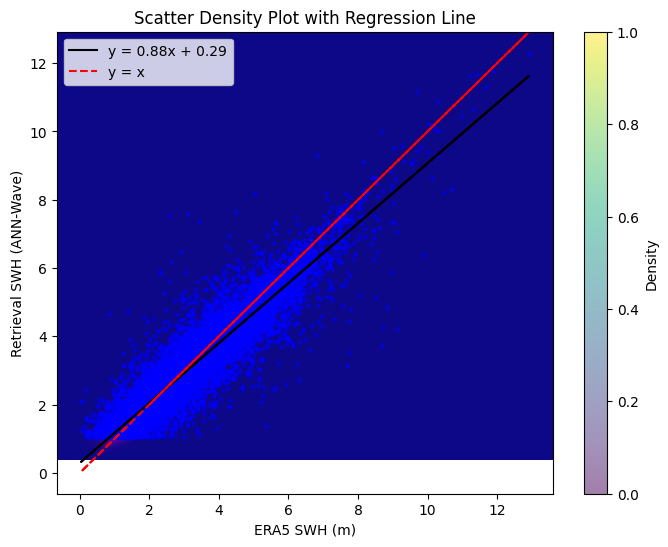

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 创建图表
plt.figure(figsize=(8, 6))

# 使用 seaborn 绘制密度散点图，替换掉 'jet' 为 'viridis'
sns.kdeplot(x=x, y=y, cmap='plasma', fill=True, thresh=0, levels=100)

# 绘制散点
plt.scatter(x, y, s=5, color='blue', alpha=0.5)

# 添加回归线
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, slope * x + intercept, color='black', label=f'y = {slope:.2f}x + {intercept:.2f}')

# 添加参考线（比如 y = x 的线）
plt.plot(x, x, '--', color='red', label='y = x')

# 设置标签和标题
plt.title('Scatter Density Plot with Regression Line')
plt.xlabel('ERA5 SWH (m)')
plt.ylabel('Retrieval SWH (ANN-Wave)')
plt.colorbar(label='Density')

# 显示图例
plt.legend()

# 显示图像
plt.show()


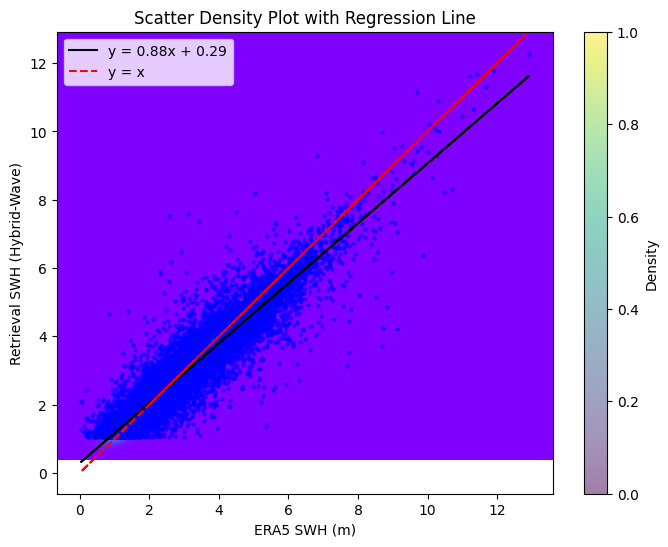

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 创建图表
plt.figure(figsize=(8, 6))

# 使用 seaborn 绘制密度散点图，使用 'rainbow' 配色
sns.kdeplot(x=x, y=y, cmap='rainbow', fill=True, thresh=0, levels=100)

# 绘制散点
plt.scatter(x, y, s=5, color='blue', alpha=0.5)

# 添加回归线
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, slope * x + intercept, color='black', label=f'y = {slope:.2f}x + {intercept:.2f}')

# 添加参考线（比如 y = x 的线）
plt.plot(x, x, '--', color='red', label='y = x')

# 设置标签和标题
plt.title('Scatter Density Plot with Regression Line')
plt.xlabel('ERA5 SWH (m)')
plt.ylabel('Retrieval SWH (Hybrid-Wave)')
plt.colorbar(label='Density')

# 显示图例
plt.legend()

# 显示图像
plt.show()


In [38]:

# 找到trans_swh中值为1.046416的位置
indices = np.where(trans_swh < 1.047)

# 删除trans_swh中的这些值
swh1 = np.delete(trans_swh, indices)


# 删除era5_swh中对应位置的值
swh2 = np.delete(era5_swh, indices)

# 打印删除后的数组，检查结果
print("swh1:", swh1)
print("swh2:", swh2)

swh1: [1.9651656 4.3965974 2.7207284 ... 2.6030974 3.6496358 1.4646163]
swh2: [2.0233614 4.9361606 2.6568863 ... 2.4506004 3.9887958 1.4634358]


In [28]:
min(swh1)

1.046538

In [39]:
import pandas as pd

def get_smallest_1000_trans_swh(df):
    """
    从数据框中提取 trans_swh 列最小的 1000 个值
    :param df: 包含 'trans_swh' 列的数据框
    :return: 包含最小的 1000 个 trans_swh 值的 Pandas Series
    """
    if 'swh1' not in df.columns:
        raise ValueError("数据框中没有 'trans_swh' 列")
    
    # 提取最小的1000个值
    min_1000_values = df['swh1'].nsmallest(5000)
    return min_1000_values

# 示例使用
if __name__ == "__main__":
    # 生成一些示例数据

    df = pd.DataFrame({
    'swh1': swh1 })
    # 调用函数
    smallest_1000_values = get_smallest_1000_trans_swh(df)
    print(smallest_1000_values)


24448    1.047010
3184     1.047028
18704    1.047039
16167    1.047114
1964     1.047184
           ...   
2727     1.675342
23911    1.675371
18676    1.675493
21358    1.675541
10203    1.675678
Name: swh1, Length: 5000, dtype: float32


In [30]:
min(era5_swh)

0.035111748

swh1: [1.9651656 1.0464157 1.0464157 ... 2.6030974 3.6496358 1.4646163]
swh2: [2.0233614 1.8422375 0.5466394 ... 2.4506004 3.9887958 1.4634358]


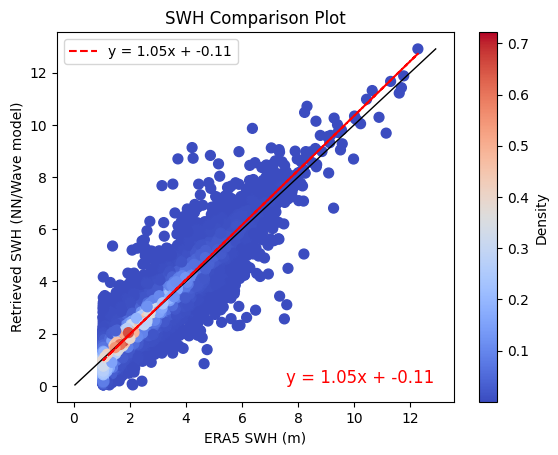

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde

# Load your data (Assuming 'swh1' and 'swh2' are already in your workspace)
# Example loading code (you might not need this if 'swh1' and 'swh2' are already variables)
# data = pd.read_csv('your_data.csv')
# swh1 = data['swh1']
# swh2 = data['swh2']

# Calculate the point density
xy = np.vstack([swh2, swh1])
z = gaussian_kde(xy)(xy)

# Create the plot
fig, ax = plt.subplots()
sc = ax.scatter(swh1, swh2, c=z, s=50, cmap='coolwarm')

# Adding a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Density')

# Add y=x line (black solid line)
ax.plot([min(swh1.min(), swh2.min()), max(swh1.max(), swh2.max())], 
        [min(swh1.min(), swh2.min()), max(swh1.max(), swh2.max())], 
        color='black', linestyle='-', linewidth=1)

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(swh1, swh2)
ax.plot(swh1, slope*swh1 + intercept, 'r--', label=f'y = {slope:.2f}x + {intercept:.2f}')

# Label your axes and title
ax.set_xlabel('ERA5 SWH (m)')
ax.set_ylabel('Retrieved SWH (NN/Wave model)')
ax.set_title('SWH Comparison Plot')

# Legend and equation
ax.legend(loc='upper left')
plt.text(0.95, 0.05, f'y = {slope:.2f}x + {intercept:.2f}', 
         transform=ax.transAxes, horizontalalignment='right', 
         color='red', fontsize=12)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 假设你的DataFrame叫df，包含了era5_swh和trans_swh两列数据
# 读取数据
df = pd.DataFrame({
    'trans_swh': trans_swh, 'era5_swh': era5_swh
    

})
# 过滤数据，只保留trans_swh > 1.046416的数据点
filtered_df = df[df['trans_swh'] > 1.046416]

# 绘制散点密度图
x = filtered_df['era5_swh']
y = filtered_df['trans_swh']

# 计算点的密度
xy = np.vstack([x, y])
z = np.histogram2d(x, y, bins=100, range=[[np.min(x), np.max(x)], [np.min(y), np.max(y)]])[0]
z = np.rot90(z)
z = np.flipud(z)
z = np.ma.masked_where(z == 0, z)  # 掩盖没有数据的区域

# 创建图和坐标轴
fig, ax = plt.subplots()

# 密度等级颜色图
c = ax.pcolormesh(np.linspace(np.min(x), np.max(x), 100), np.linspace(np.min(y), np.max(y), 100), z, shading='auto', cmap='viridis')
ax.plot(x, y, 'k.', markersize=0.5)
ax.set_xlabel('ERA5 SWH (m)')
ax.set_ylabel('Retrieved SWH (NN/Wave) (m)')
ax.set_title('Scatter Density Plot of SWH')

# 添加颜色条
fig.colorbar(c, ax=ax)

# 显示图形
plt.show()


/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


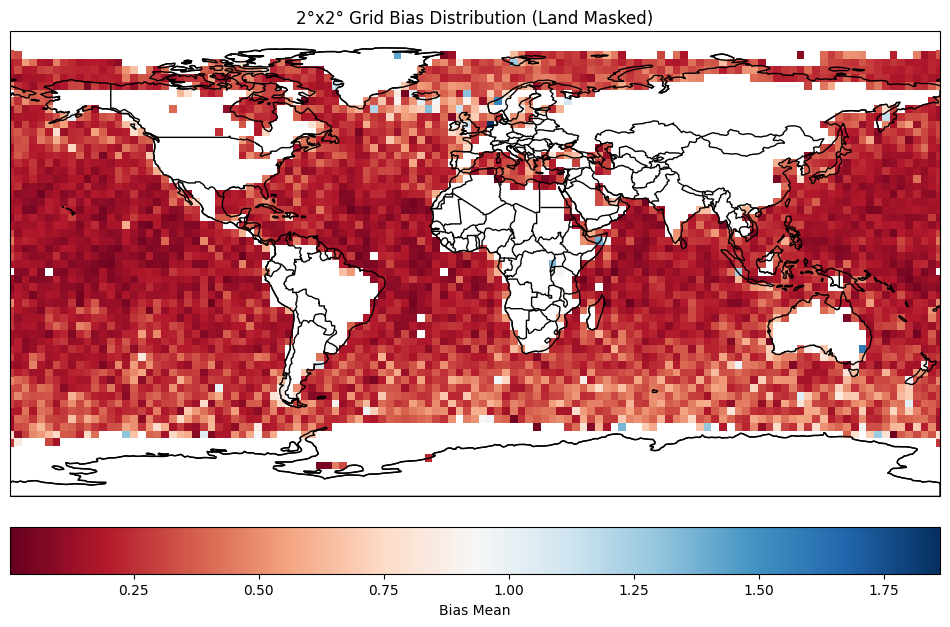

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

bias=np.abs(era5_swh-vit_swh)
lat1=lat
lon1=lon

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 2°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 -180 到 180，步长为 2°

# 使用np.digitize将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_bias = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_bias[i, j] = np.nanmean(bias[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征，但不绘制陆地区域
ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_bias, cmap='RdBu', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='Bias Mean')

# 设置图像标题
plt.title('2°x2° Grid Bias Distribution (Land Masked)')
plt.show()

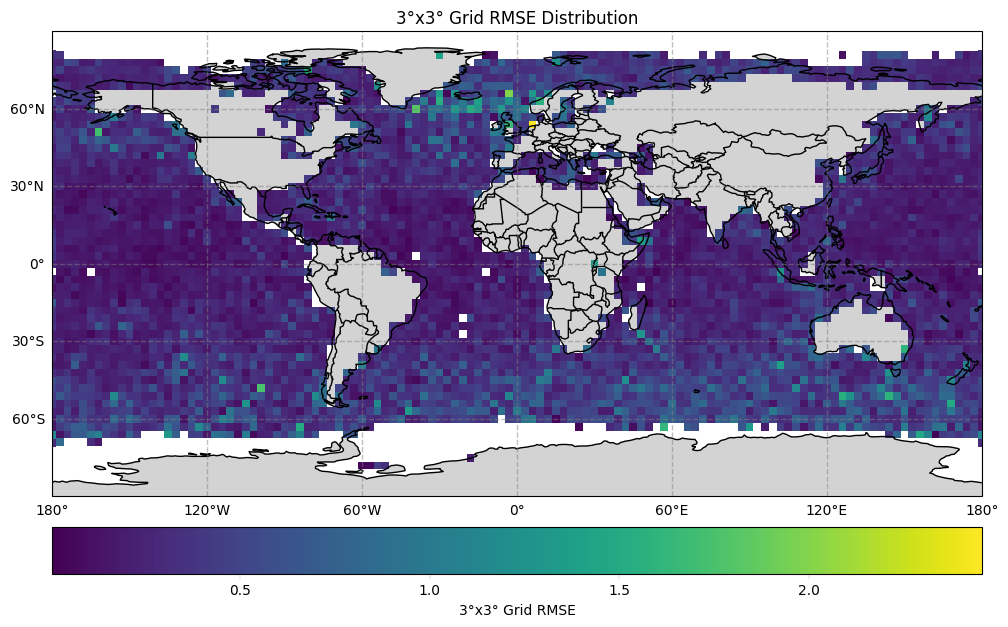

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# vit_swh 和 era5_swh 是两个对应的 SWH 数据集
# vit_swh = ...
# era5_swh = ...

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 3°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 0 到 360，步长为 3°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的RMSE
grid_rmse = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的 RMSE
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_rmse[i, j] = np.sqrt(np.nanmean((vit_swh[mask] - era5_swh[mask])**2))

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()

# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的 RMSE 分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_rmse, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid RMSE')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度

# 设置图像标题
plt.title('3°x3° Grid RMSE Distribution')
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# vit_swh 和 era5_swh 是两个对应的 SWH 数据集
# vit_swh = ...
# era5_swh = ...
lat1=lat
lon1=lon
# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 3°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 0 到 360，步长为 3°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的 RMSE
grid_rmse = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的 RMSE
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_rmse[i, j] = np.sqrt(np.nanmean((vit_swh[mask] - era5_swh[mask])**2))

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()

# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的 RMSE 分布，并限制颜色范围在 0 到 1，使用白色到深红色的配色
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_rmse, cmap='Reds', transform=ccrs.PlateCarree(), shading='auto', vmin=0, vmax=1)

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid RMSE Distribution(m)')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度

# 设置图像标题
plt.title('3°x3° Grid RMSE Distribution (0-1)')
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 32497 but corresponding boolean dimension is 324959

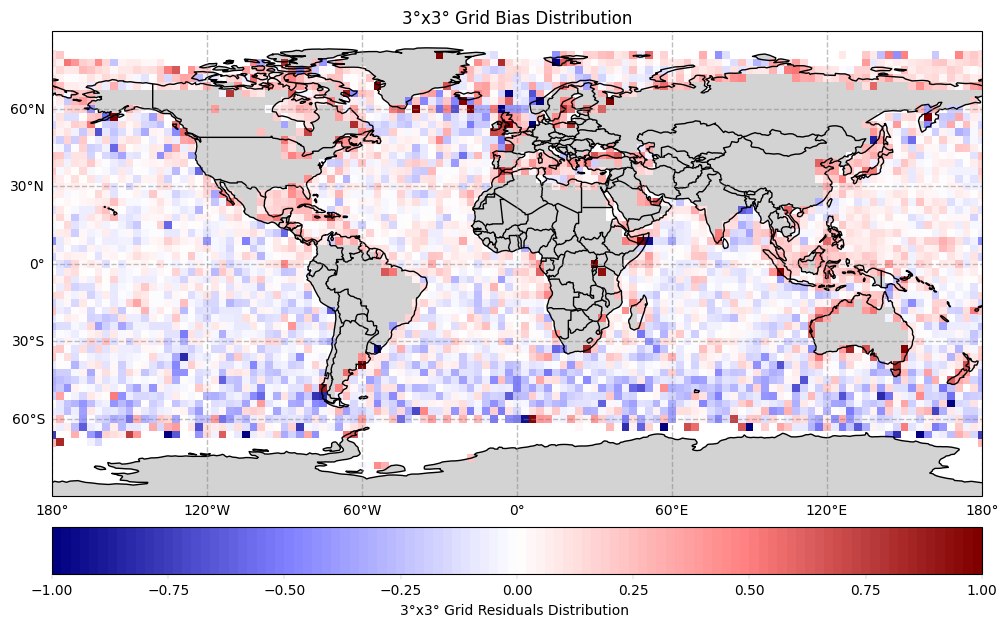

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap

# 假设 vit_swh 和 era5_swh 是两个对应的 SWH 数据集
# vit_swh = ...
# era5_swh = ...

# 计算 bias
# bias = vit_swh-np.average(era5_swh)
bias = vit_swh-era5_swh

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 3°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 0 到 360，步长为 3°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的 bias
grid_bias = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的 bias 均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_bias[i, j] = np.nanmean(bias[mask])

# 自定义颜色映射，确保0的值为白色
colors = [(0, 0, 0.5), (0.5, 0.5, 1), (1, 1, 1), (1, 0.5, 0.5), (0.5, 0, 0)]
cmap_name = 'custom_bias_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()

# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的 bias 分布，使用自定义的颜色映射
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_bias, cmap=cmap, transform=ccrs.PlateCarree(), shading='auto',vmin=-1, vmax=1)

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid Residuals Distribution ')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度

# 设置图像标题
plt.title('3°x3° Grid Bias Distribution')
plt.show()


/tmp/ipykernel_23/4175214456.py:31: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(vit_swh[mask], era5_swh[mask])


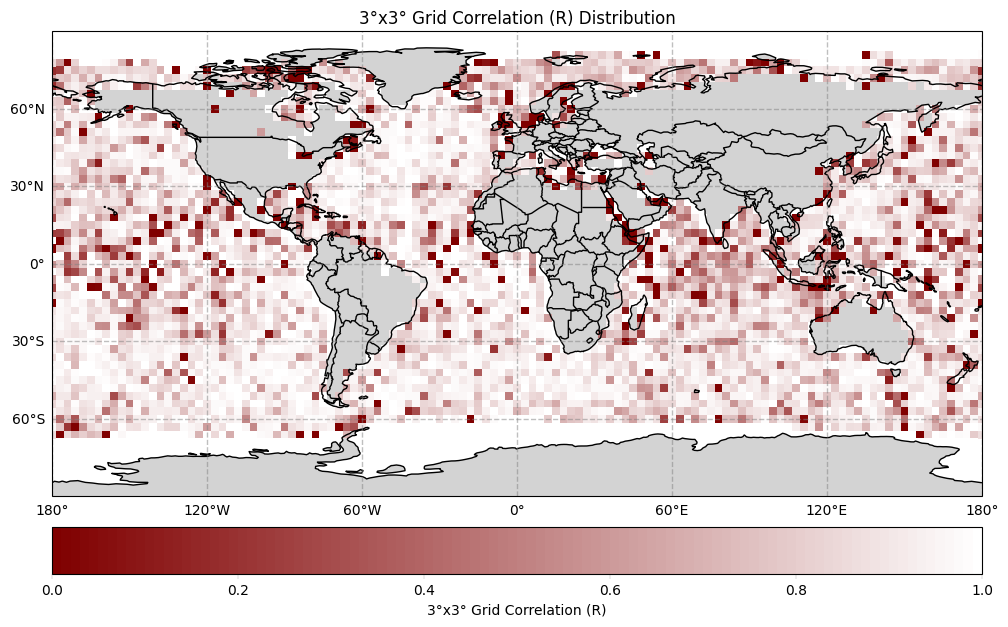

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import pearsonr
from matplotlib.colors import LinearSegmentedColormap

# 假设 vit_swh 和 era5_swh 是两个对应的 SWH 数据集
# vit_swh = ...
# era5_swh = ...

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 3°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 0 到 360，步长为 3°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的相关系数 R
grid_corr = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的相关系数 R
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            # 计算相关系数 (R)
            if len(vit_swh[mask]) > 1:  # 确保有足够的数据点进行计算
                r, _ = pearsonr(vit_swh[mask], era5_swh[mask])
                grid_corr[i, j] = r

# 自定义颜色映射：0 为深红，1 为白色
colors = [(0.5, 0, 0), (1, 1, 1)]  # 深红到白色的渐变
cmap_name = 'custom_corr_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()

# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的相关系数 R 分布，使用自定义的颜色映射
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_corr, cmap=cmap, transform=ccrs.PlateCarree(), shading='auto', vmin=0, vmax=1)

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid Correlation (R)')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度

# 设置图像标题
plt.title('3°x3° Grid Correlation (R) Distribution')
plt.show()


In [97]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 8.5 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


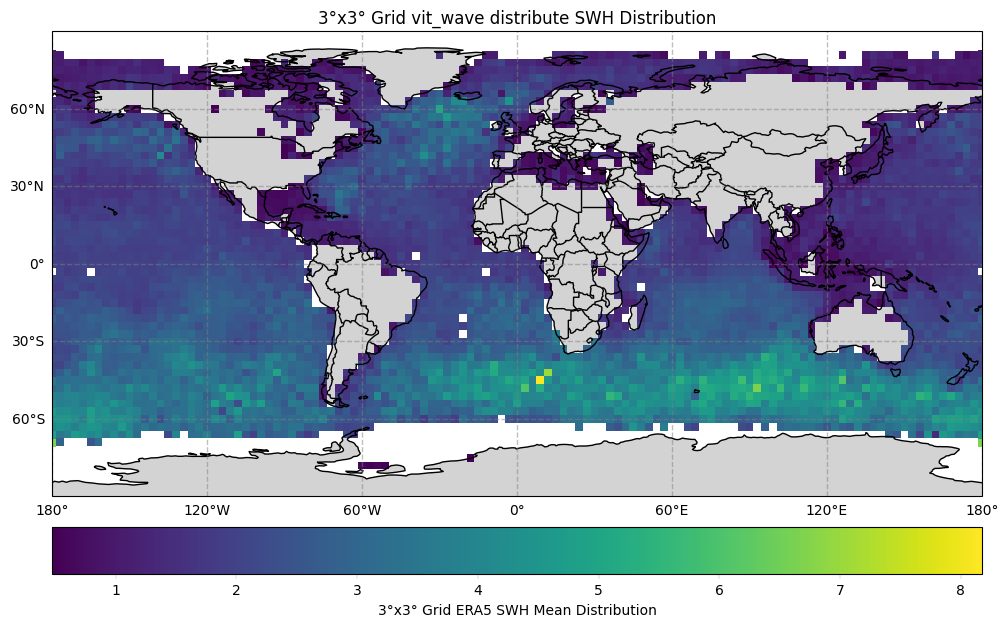

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# swh=np.abs(vit_swh-era5_swh)
swh=vit_swh
# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 2°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 -180 到 180，步长为 2°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_swh = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_swh[i, j] = np.nanmean(swh[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()


# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_swh, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid ERA5 SWH Mean Distribution')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度
# cbar.ax.set_aspect(400)  # 这里的值可以调整以改变颜色条的厚度，值越大颜色条越细

# 设置图像标题
plt.title('3°x3° Grid vit_wave distribute SWH Distribution')
plt.show()


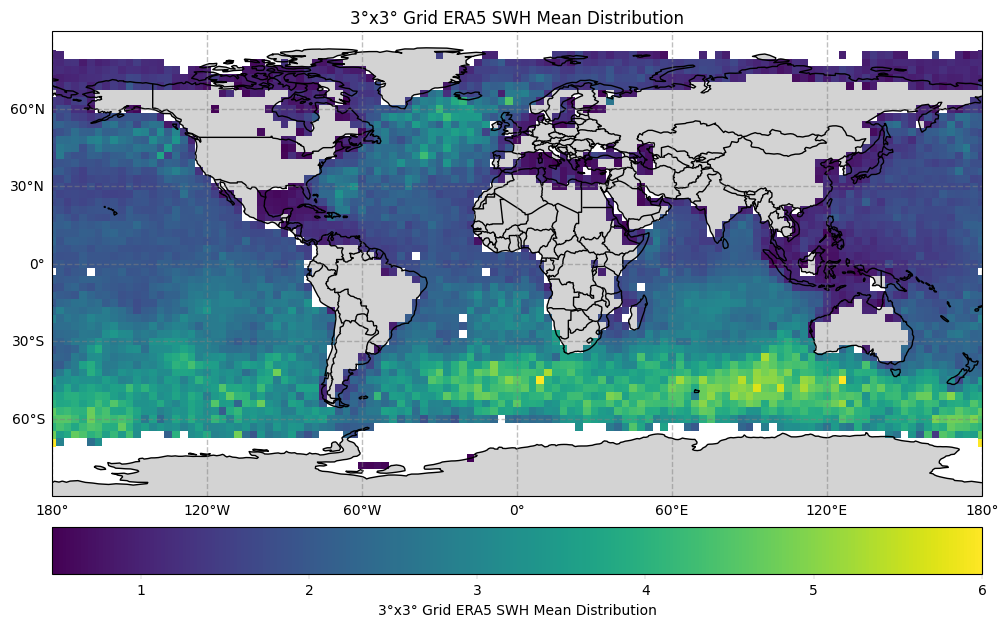

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# swh=np.abs(vit_swh-era5_swh)
swh=vit_swh


# 限制 SWH 数据在 0 到 7 的范围内
swh = np.clip(swh, 0,6 )

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 2°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 -180 到 180，步长为 2°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_swh = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_swh[i, j] = np.nanmean(swh[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()


# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_swh, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid ERA5 SWH Mean Distribution')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度
# cbar.ax.set_aspect(400)  # 这里的值可以调整以改变颜色条的厚度，值越大颜色条越细

# 设置图像标题
plt.title('3°x3° Grid ERA5 SWH Mean Distribution')
plt.show()


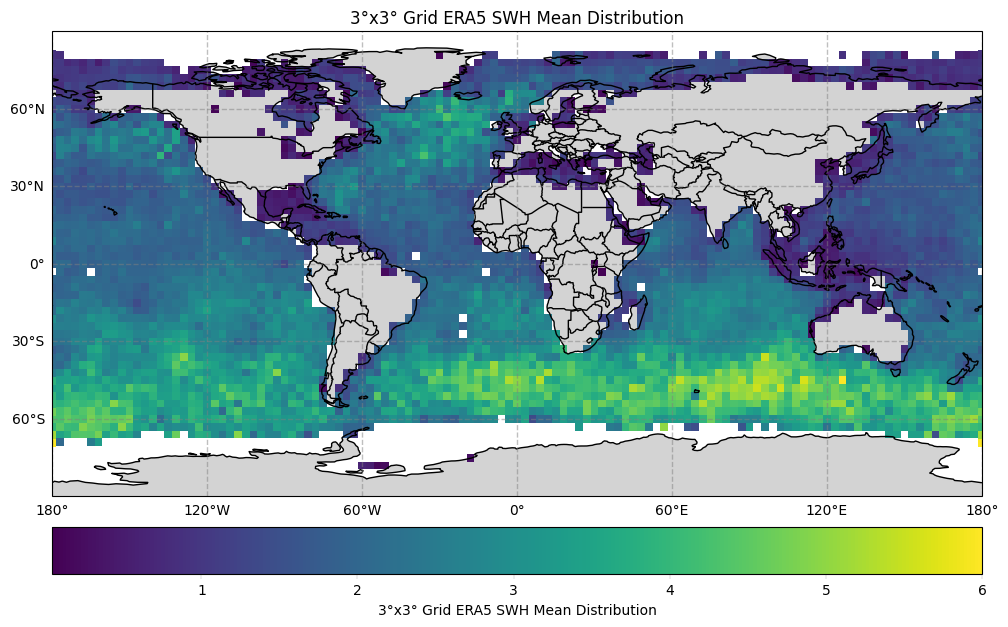

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# swh=np.abs(vit_swh-era5_swh)
swh=era5_swh


# 限制 SWH 数据在 0 到 7 的范围内
swh = np.clip(swh, 0,6 )

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 2°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 -180 到 180，步长为 2°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_swh = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_swh[i, j] = np.nanmean(swh[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()


# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_swh, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid ERA5 SWH Mean Distribution')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度
# cbar.ax.set_aspect(400)  # 这里的值可以调整以改变颜色条的厚度，值越大颜色条越细

# 设置图像标题
plt.title('3°x3° Grid ERA5 SWH Mean Distribution')
plt.show()


11.537465


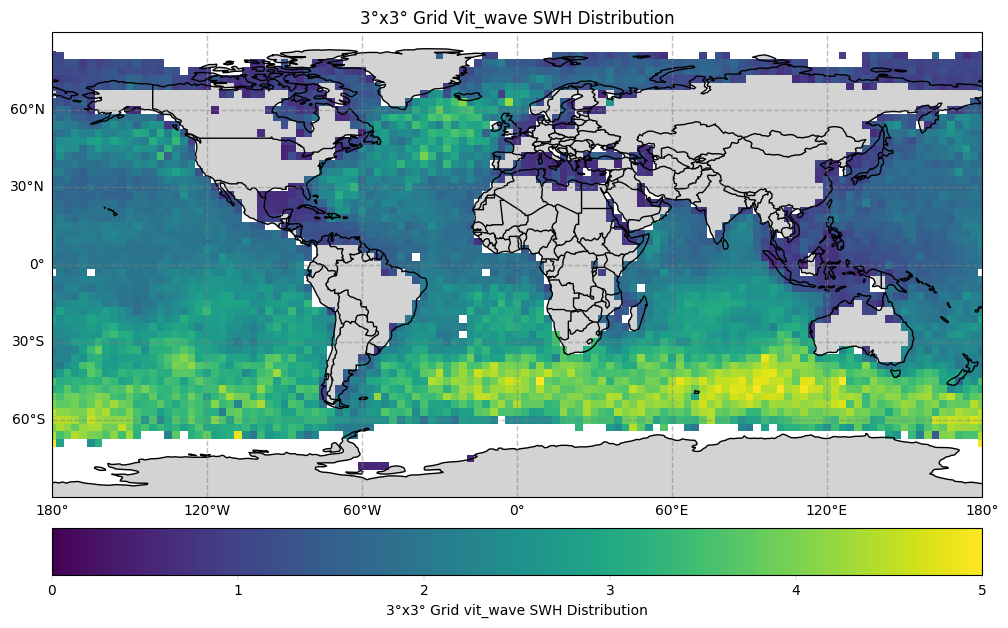

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# swh=np.abs(vit_swh-era5_swh)
swh = vit_swh
print(max(swh))
# 限制 SWH 数据在 0 到 6 的范围内
swh = np.clip(swh, 0, 5)

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 3°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 0 到 360，步长为 3°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_swh = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_swh[i, j] = np.nanmean(swh[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()

# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_swh, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto', vmin=0, vmax=5)

# 添加颜色条，并调整其宽度和刻度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid vit_wave SWH Distribution')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度
cbar.set_ticks([0,1, 2, 3, 4, 5])  # 设置刻度为 1, 2, 3, 4, 5

# 设置图像标题
plt.title('3°x3° Grid Vit_wave SWH Distribution')
plt.show()


12.909691


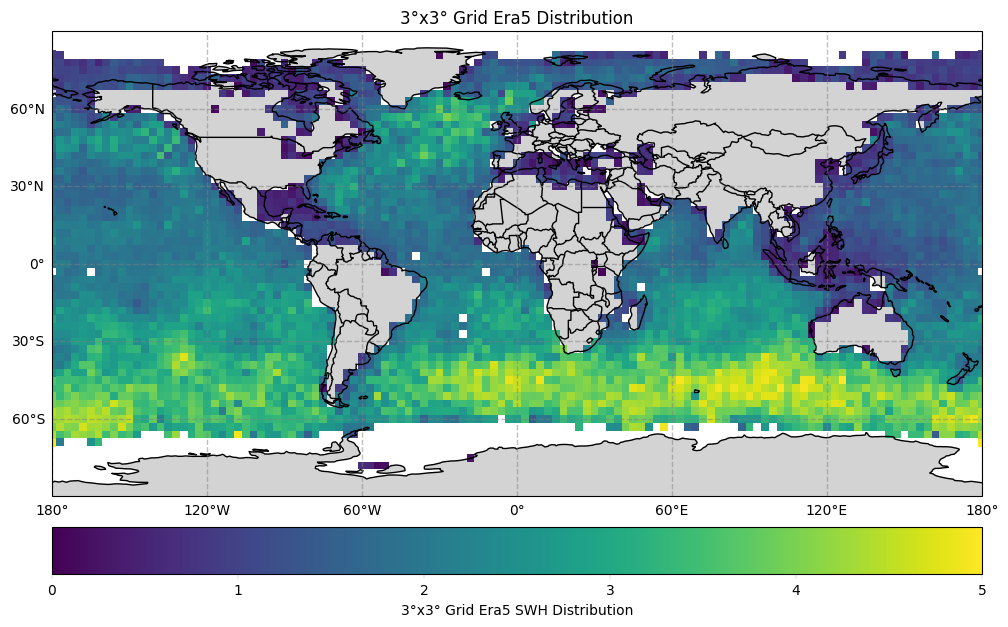

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# swh=np.abs(vit_swh-era5_swh)
swh = era5_swh
print(max(swh))
# 限制 SWH 数据在 0 到 6 的范围内
swh = np.clip(swh, 0,5)

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 3°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 0 到 360，步长为 3°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_swh = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_swh[i, j] = np.nanmean(swh[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()

# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_swh, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto', vmin=0, vmax=5)

# 添加颜色条，并调整其宽度和刻度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid Era5 SWH Distribution')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度
cbar.set_ticks([0,1, 2, 3, 4, 5 ])  # 设置刻度为 1, 2, 3, 4, 5

# 设置图像标题
plt.title('3°x3° Grid Era5 Distribution')
plt.show()


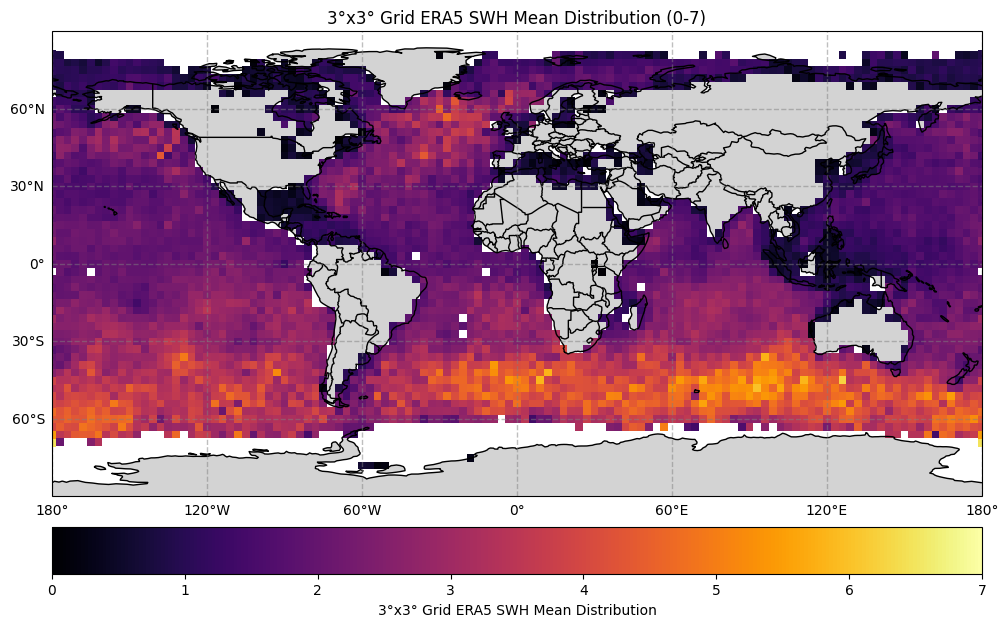

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# swh=np.abs(vit_swh-era5_swh)
swh = era5_swh

# 限制 SWH 数据在 0 到 7 的范围内
swh = np.clip(swh, 0, 7)

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 3°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 0 到 360，步长为 3°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_swh = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_swh[i, j] = np.nanmean(swh[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()

# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的均值分布，使用从深色到亮黄色的颜色渐变
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_swh, cmap='inferno', transform=ccrs.PlateCarree(), shading='auto', vmin=0, vmax=7)

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid ERA5 SWH Mean Distribution')


# 设置图像标题
plt.title('3°x3° Grid ERA5 SWH Mean Distribution (0-7)')
plt.show()



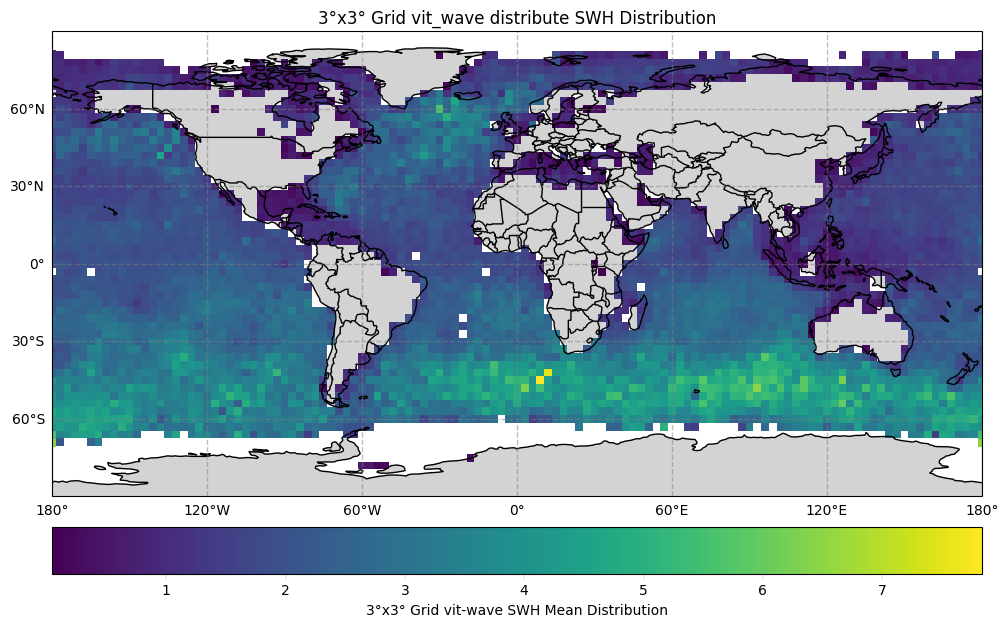

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

bias=vit_swh
# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 2°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 -180 到 180，步长为 2°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_swh = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_swh[i, j] = np.nanmean(swh[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()


# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_swh, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid vit-wave SWH Mean Distribution')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度
# cbar.ax.set_aspect(400)  # 这里的值可以调整以改变颜色条的厚度，值越大颜色条越细

# 设置图像标题
plt.title('3°x3° Grid vit_wave distribute SWH Distribution')
plt.show()


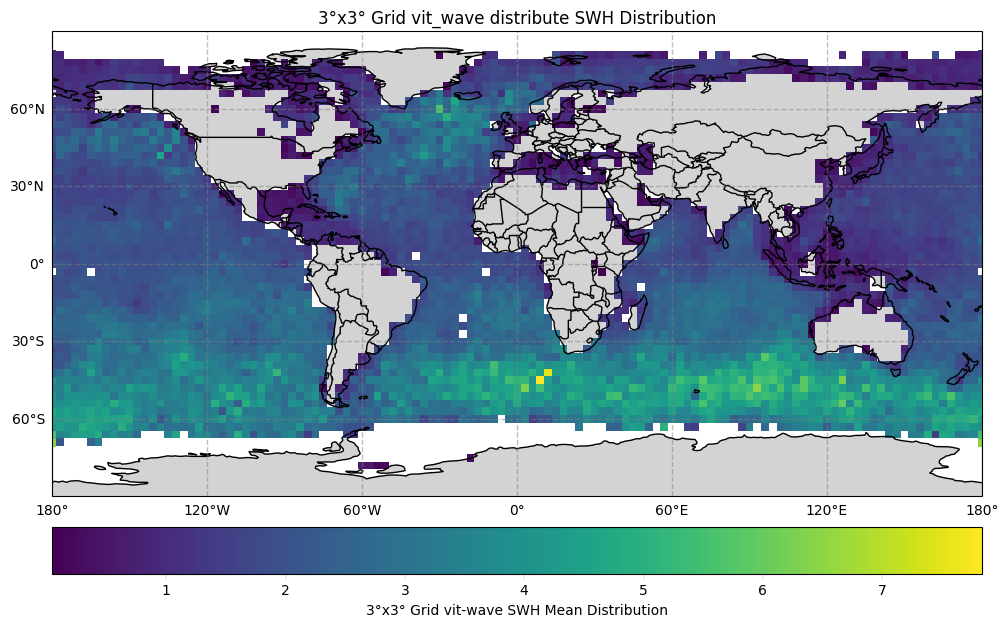

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

bias=vit_swh-swh
# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 2°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 -180 到 180，步长为 2°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_swh = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_swh[i, j] = np.nanmean(swh[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()


# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_swh, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='3°x3° Grid vit-wave SWH Mean Distribution')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度
# cbar.ax.set_aspect(400)  # 这里的值可以调整以改变颜色条的厚度，值越大颜色条越细

# 设置图像标题
plt.title('3°x3° Grid vit_wave distribute SWH Distribution')
plt.show()


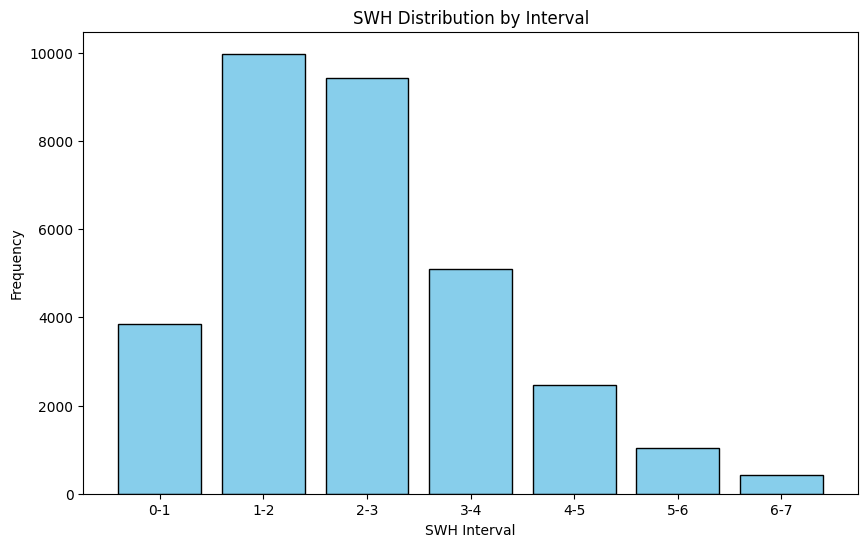

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据：假设 swh 是 SWH 数据
# swh = np.array([...])

# 定义分区边界
bins = [0, 1, 2, 3, 4, 5, 6, 7]
bin_labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7']

# 对 SWH 数据进行分区统计
hist, bin_edges = np.histogram(swh, bins=bins)

# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(bin_labels, hist, color='skyblue', edgecolor='black')

# 设置图像标题和标签
ax.set_title('SWH Distribution by Interval')
ax.set_xlabel('SWH Interval')
ax.set_ylabel('Frequency')

# 显示图像
plt.show()



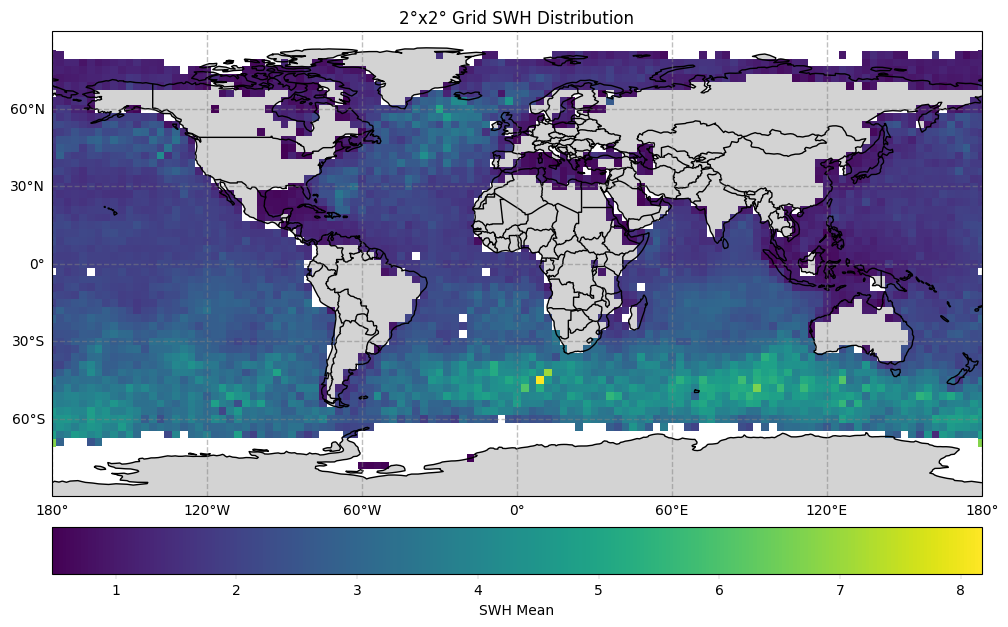

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

bias=vit_swh
# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 2°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 -180 到 180，步长为 2°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_swh = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_swh[i, j] = np.nanmean(bias[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()


# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_swh, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='SWH Mean')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度
# cbar.ax.set_aspect(400)  # 这里的值可以调整以改变颜色条的厚度，值越大颜色条越细

# 设置图像标题
plt.title('2°x2° Grid SWH Distribution')
plt.show()


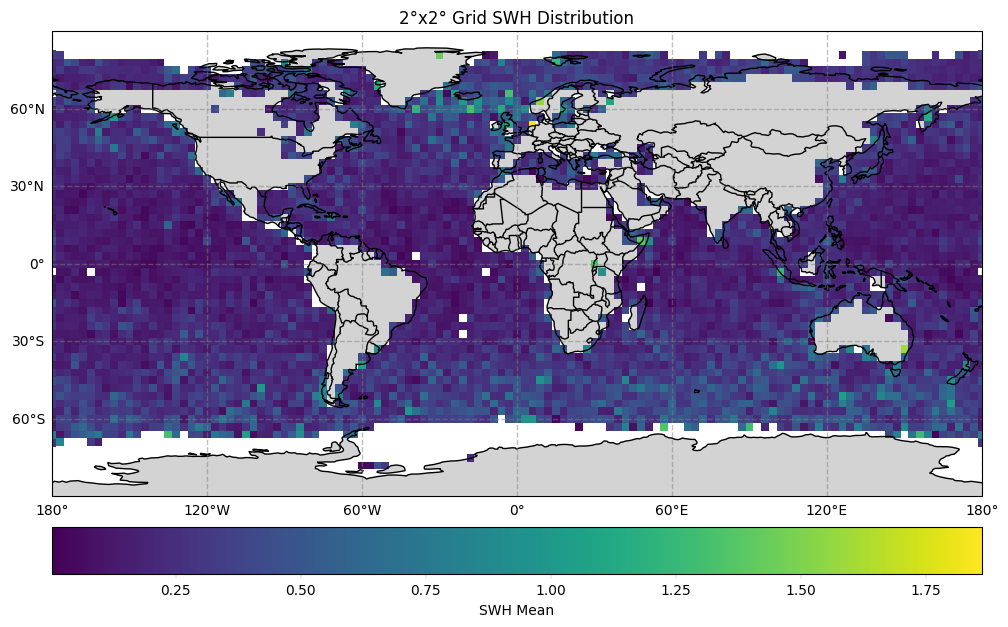

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

bias=np.abs(swh-vit_swh)

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 2°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 -180 到 180，步长为 2°

# 使用 np.digitize 将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_swh = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_swh[i, j] = np.nanmean(bias[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()


# 添加网格线条
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_swh, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条，并调整其宽度
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='SWH Mean')
cbar.ax.tick_params(width=0.1)  # 调整颜色条的刻度线宽度
# cbar.ax.set_aspect(400)  # 这里的值可以调整以改变颜色条的厚度，值越大颜色条越细

# 设置图像标题
plt.title('2°x2° Grid SWH Distribution')
plt.show()



/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


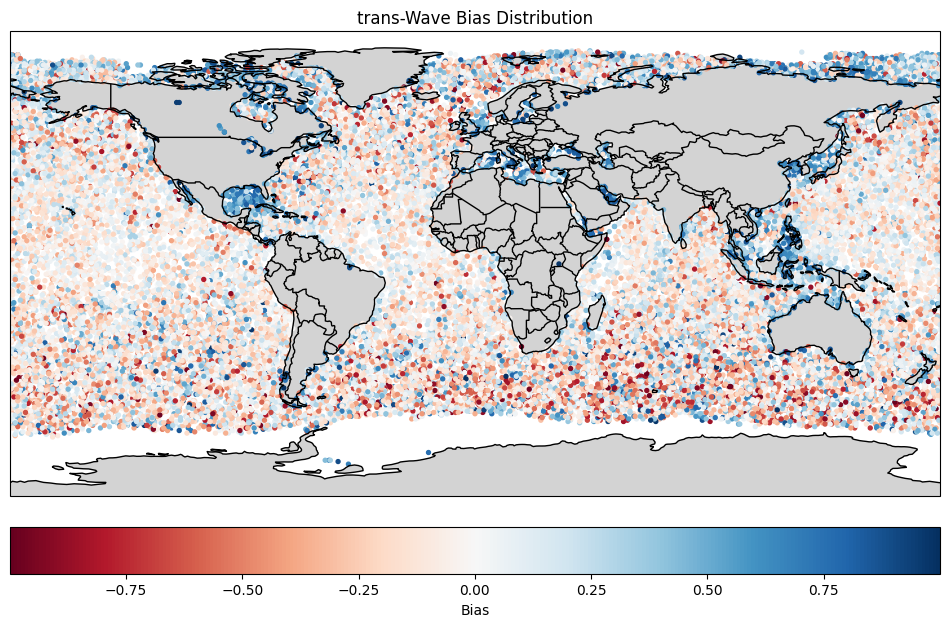

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

bias=transbias[condition]
lat1=lat[condition]
lon1=lon[condition]
# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# 绘制偏差的分布
sc = ax.scatter(lon1, lat1, c=bias, cmap='RdBu', s=8, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='Bias')
# cbar.ax.set_aspect(40)  # 这里的值可以调整以改变颜色条的厚度，值越大颜色条越细
# 设置图像标题
plt.title('trans-Wave Bias Distribution')
plt.show()

In [21]:
max(lat1)
max(lon1)
transbias = ann_swh - swh
condition = (transbias >= -1) & (transbias <= 1)
print(2)

NameError: name 'lat1' is not defined

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 示例数据
# bias=transbias[condition]
# lat1=lat[condition]
# lon1=lon[condition]

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 2, 2)  # 纬度范围从 -90 到 90，步长为 2°
lon_bins = np.arange(0, 360 + 2, 2)  # 经度范围从 -180 到 180，步长为 2°

# 使用np.digitize将点分配到网格中
lat_indices = np.digitize(lat, lat_bins) - 1
lon_indices = np.digitize(lon, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_bias = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_bias[i, j] = np.nanmean(bias[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_bias, cmap='RdBu', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='Bias Mean')

# 设置图像标题
plt.title('2°x2° Grid Bias Distribution')
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 31399 but corresponding boolean dimension is 32497

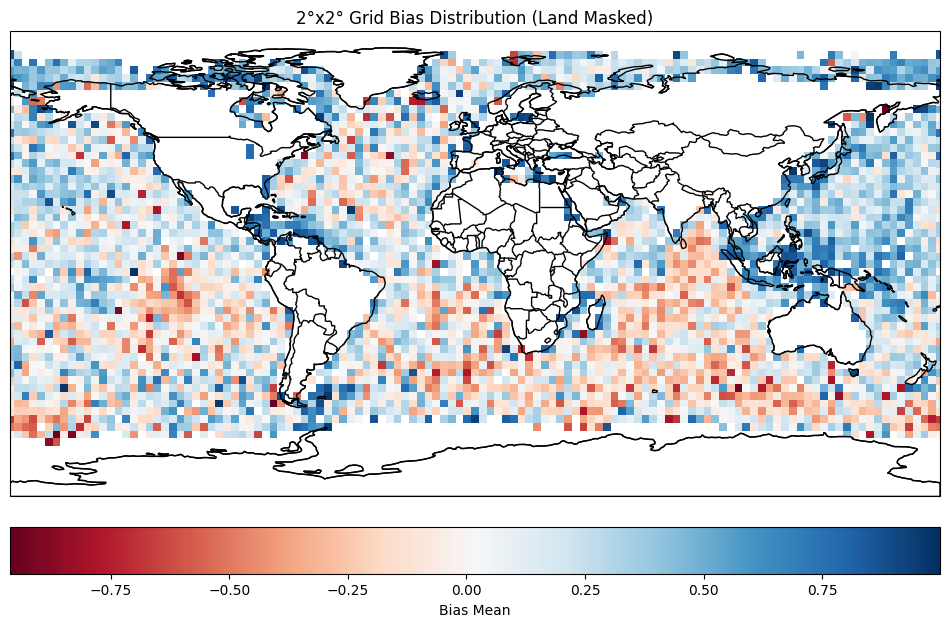

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

bias=transbias[condition]
lat1=lat[condition]
lon1=lon[condition]

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 2°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 -180 到 180，步长为 2°

# 使用np.digitize将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_bias = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_bias[i, j] = np.nanmean(bias[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征，但不绘制陆地区域
ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.coastlines()

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_bias, cmap='RdBu', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='Bias Mean')

# 设置图像标题
plt.title('2°x2° Grid Bias Distribution (Land Masked)')
plt.show()


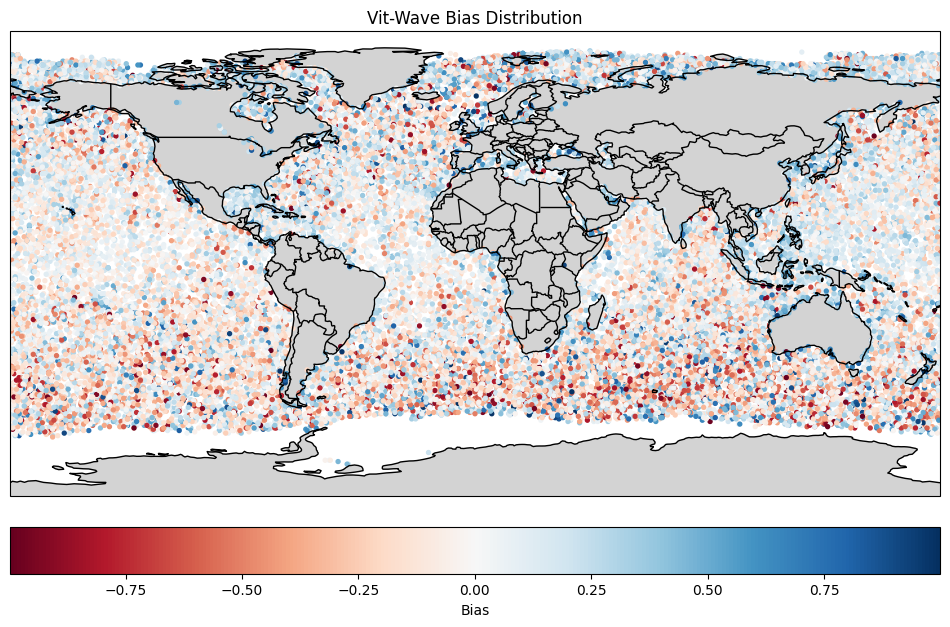

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature



# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# 绘制偏差的分布
sc = ax.scatter(lon, lat, c=bias, cmap='RdBu', s=8, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='Bias')
# cbar.ax.set_aspect(40)  # 这里的值可以调整以改变颜色条的厚度，值越大颜色条越细
# 设置图像标题
plt.title('Vit-Wave Bias Distribution')
plt.show()


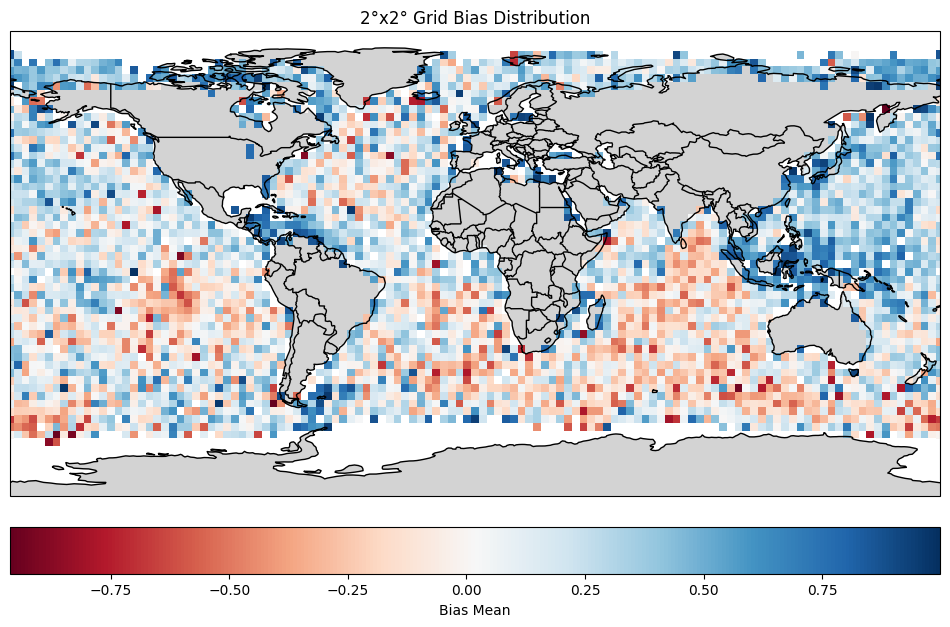

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 示例数据
bias=transbias[condition]
lat1=lat[condition]
lon1=lon[condition]

# 定义网格的边界和分辨率
lat_bins = np.arange(-90, 90 + 3, 3)  # 纬度范围从 -90 到 90，步长为 2°
lon_bins = np.arange(0, 360 + 3, 3)  # 经度范围从 -180 到 180，步长为 2°

# 使用np.digitize将点分配到网格中
lat_indices = np.digitize(lat1, lat_bins) - 1
lon_indices = np.digitize(lon1, lon_bins) - 1

# 创建一个与网格大小相同的二维数组来存储每个网格单元的均值
grid_bias = np.full((len(lat_bins), len(lon_bins)), np.nan)

# 计算每个网格单元的均值
for i in range(len(lat_bins)):
    for j in range(len(lon_bins)):
        # 找到落在当前网格单元中的点
        mask = (lat_indices == i) & (lon_indices == j)
        if np.any(mask):
            grid_bias[i, j] = np.nanmean(bias[mask])

# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# 绘制网格的均值分布
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
sc = ax.pcolormesh(lon_grid, lat_grid, grid_bias, cmap='RdBu', transform=ccrs.PlateCarree(), shading='auto')

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='Bias Mean')

# 设置图像标题
plt.title('2°x2° Grid Bias Distribution')
plt.show()


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


bias = vit_swh - swh
print(bias)
condition = (bias >= -1) & (bias <= 1)
print(condition)

[-0.13078034 -0.3888135   0.12783116 ...  0.29405975 -0.22573614
  0.12366343]
[ True  True  True ...  True  True  True]


In [74]:
lat

array([  3.5,   4.5,  72.5, ...,  19. , -51. ,   5. ])

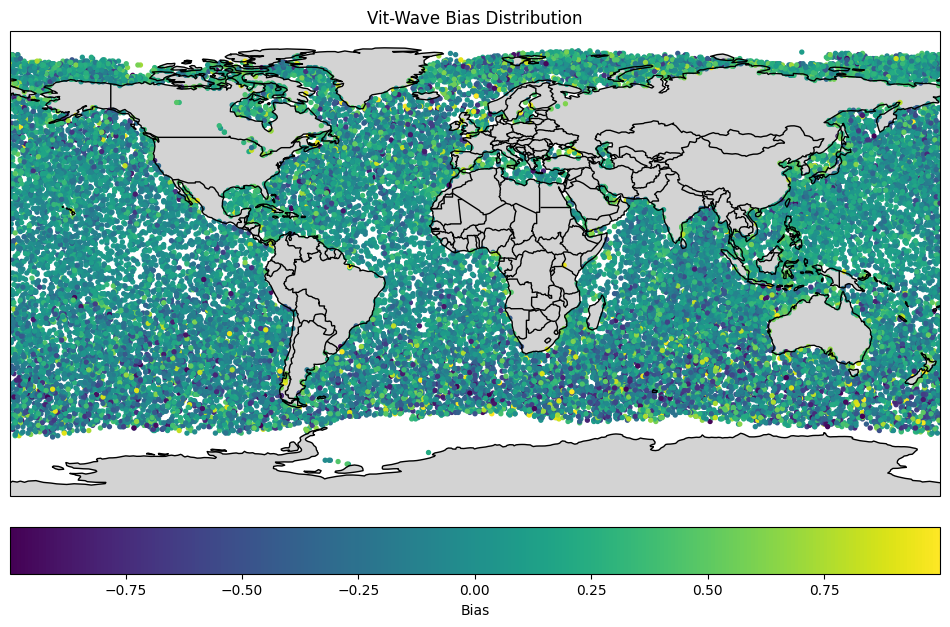

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# bias = vit_swh - swh
# print(bias)
# condition = (bias >= -1) & (bias <= 1)
# bias = bias[condition]
# lat = lat[condition]
# lon= lon[condition]
# 创建一个绘图对象，使用 PlateCarree 投影
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# 添加海岸线和陆地特征
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# 绘制偏差的分布，使用与提供的颜色条类似的colormap
sc = ax.scatter(lon, lat, c=bias, cmap='viridis', s=8, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='Bias')

# 设置图像标题
plt.title('Vit-Wave Bias Distribution')
plt.show()

  Obtaining dependency information for cartopy from https://files.pythonhosted.org/packages/af/ac/c394772fee0e8b9d05cfb5af5994d8aa158ce5bbe4f4ae61532eb91dbce9/Cartopy-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for shapely>=1.7 from https://files.pythonhosted.org/packages/2b/a6/302e0d9c210ccf4d1ffadf7ab941797d3255dcd5f93daa73aaf116a4db39/shapely-2.0.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pyshp>=2.3 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 274.2 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pyproj>=3.3.1 from https://files.pythonhosted.org/packages/f6/2b/b60cf73b0720abca313bfffef34e34f7f7dae23852b2853cf0368d49426b/pyproj-3.6.1-cp310-cp310-manylinux_2_17_x86_64.manyli

In [6]:
max(lat)

NameError: name 'lat' is not defined

In [15]:
max(lon)

1438.0

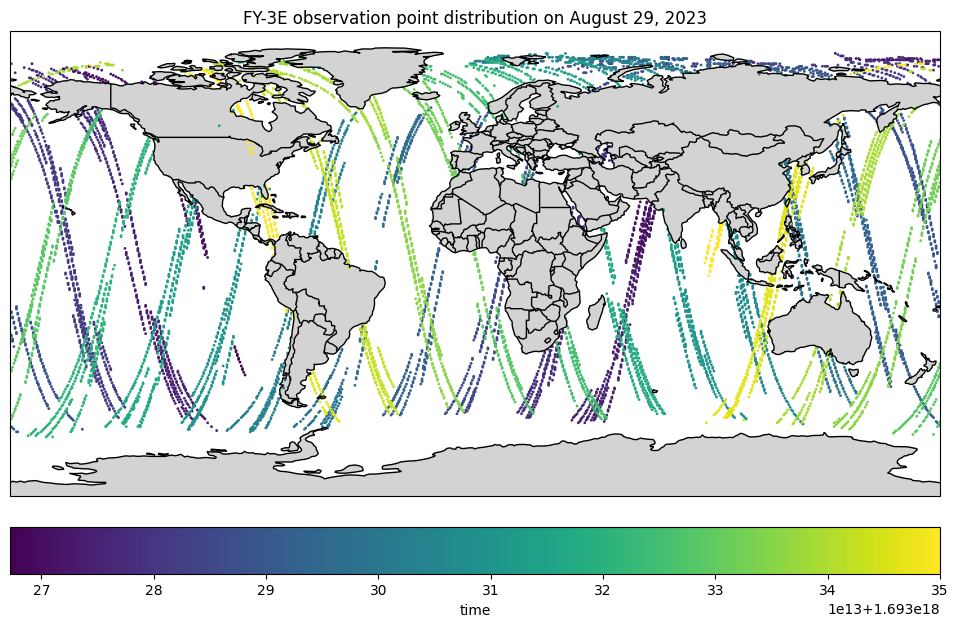

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# 示例数据（替换为实际数据）
latitudes = lat*0.25
longitudes = lon*0.25
condition = time < np.datetime64('2023-08-30T00:00:00.000000000')
filtered_values = time[condition]
latitudes = latitudes[condition]
longitudes = longitudes[condition]
values = filtered_values

# 创建经纬度网格
num_points = 500
lat_grid = np.linspace(-90, 90, num_points)
lon_grid = np.linspace(-180, 180, num_points)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# 创建图像
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# 在地图上绘制点
sc = ax.scatter(longitudes, latitudes, c=values, cmap='viridis', s=1, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='time')

# 设置标题
plt.title('FY-3E observation point distribution on August 29, 2023')
plt.show()



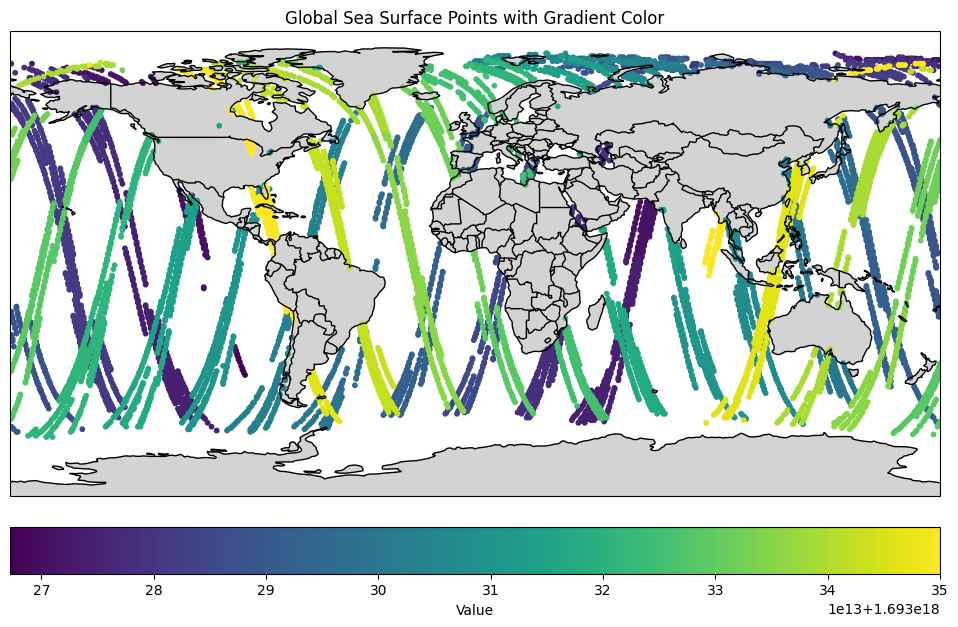

In [37]:
# 创建图像
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# 在地图上绘制点，使用颜色渐变
sc = ax.scatter(longitudes, latitudes, c=values, cmap='viridis', s=10, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='Value')

# 设置标题
plt.title('Global Sea Surface Points with Gradient Color')
plt.show()



In [28]:
condition = time < np.datetime64('2023-08-30T00:00:00.000000000')
filtered_values = time[condition]
len(filtered_values)

10343